In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
import glob

In [49]:
def plot_loss(filename, ylim=None, start=0):
#     plt.figure(figsize=(15,10))
    fig, ax = plt.subplots(figsize=(15,15))
    test_filename = filename.replace("train", "test")
    data = pd.read_csv(filename, header=None)
    ax.plot(np.log10(data.iloc[start:, 0]), label="train")
    data = pd.read_csv(test_filename, header=None)
    ax.plot(np.log10(data.iloc[start:, 0]), label="test")
    ax2 = ax.twinx()
    ax2.plot(np.log10(data.iloc[start:, 1]), label="delta", c='g')
    if ylim is not None:
        plt.ylim(ylim)
#     plt.yscale("log")
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    ax.set_xlabel('epoch')
    ax.set_ylabel('log_10(loss)')
    ax.set_title('Loss')
    ax2.set_ylabel('log_10(delta)')
    plt.show()
    
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
    
def plot_diff_loss(filename, ylim=(0,0.02), start=0, window_length=1000):
    data = pd.read_csv(filename, header=None).values.reshape(-1)
    data = running_mean(data, window_length)
    diffs = data[start:-1000] - data[(start+1000):]
    plt.plot(diffs)
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()

../entropia/fashion-mnist-dequant/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.0001_.txt


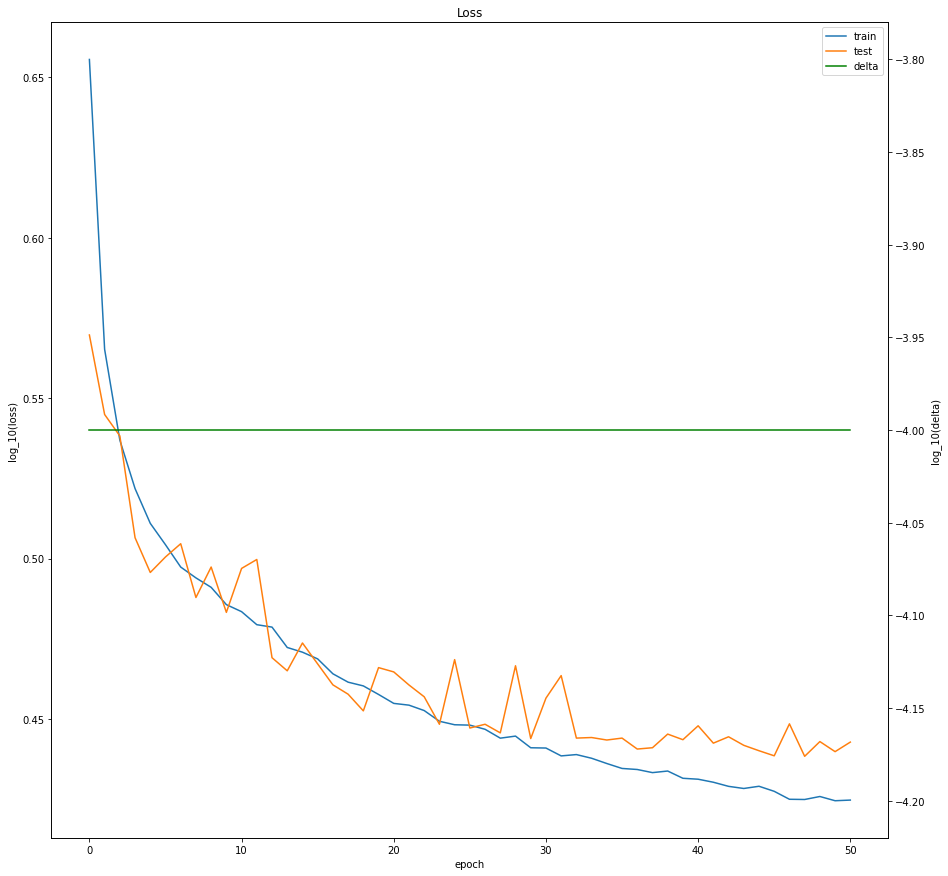

../entropia/fashion-mnist-dequant/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.000316_.txt


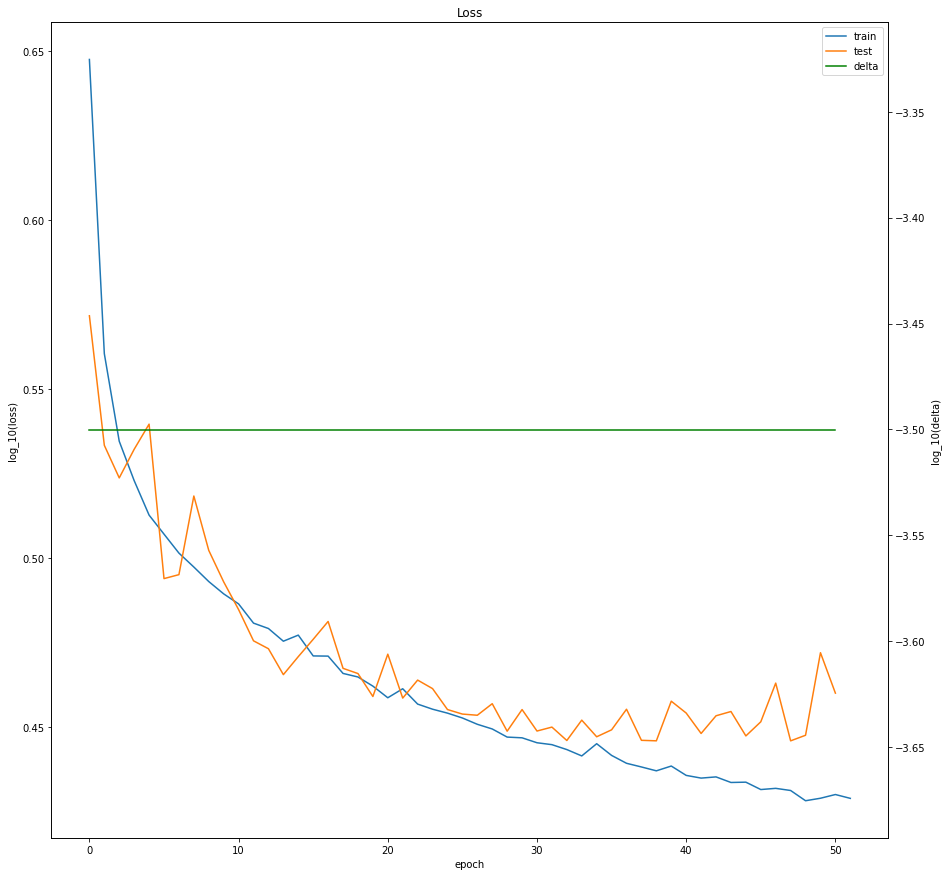

../entropia/fashion-mnist-dequant/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.001_.txt


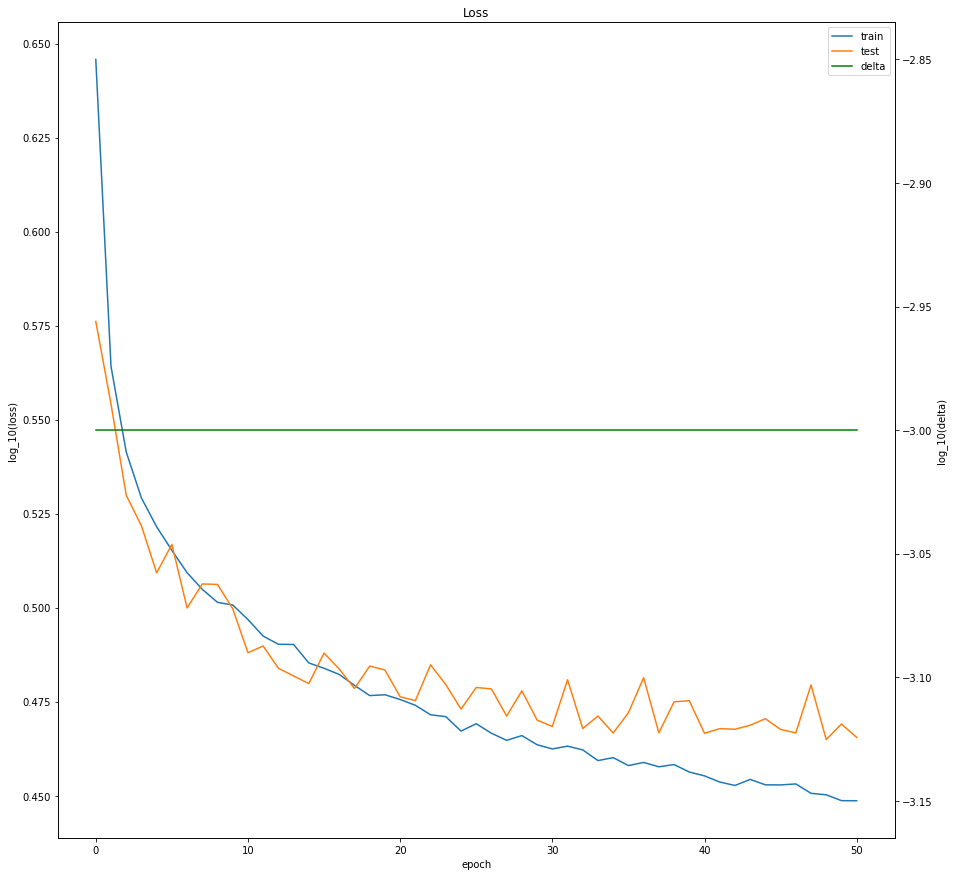

../entropia/fashion-mnist-dequant/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.031623_.txt


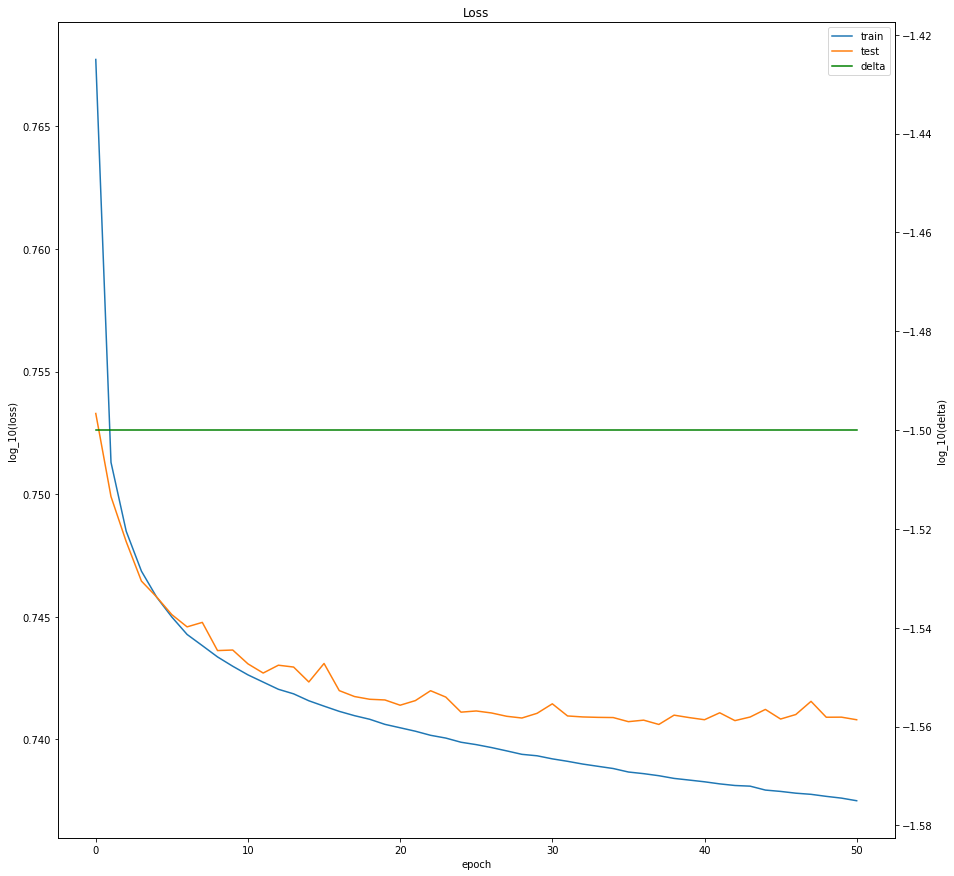

../entropia/fashion-mnist-dequant/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.0_.txt


/home/sonarhome/.virtualenvs/ordering/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


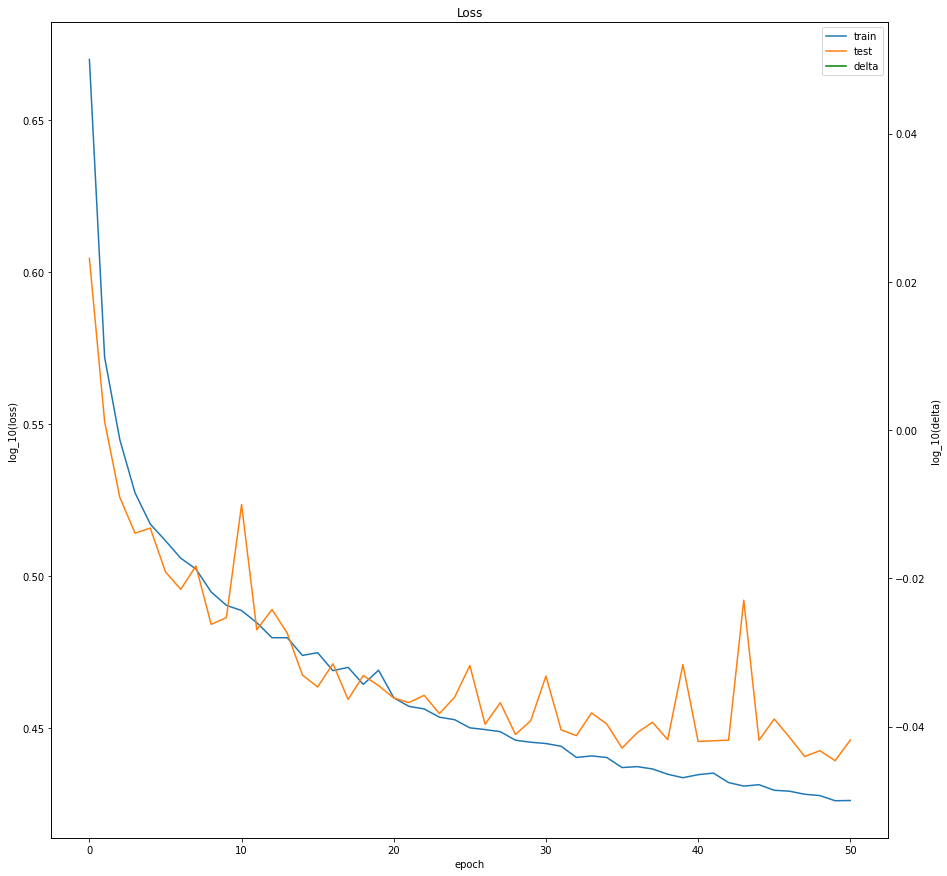

../entropia/fashion-mnist-dequant/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#1.0_.txt


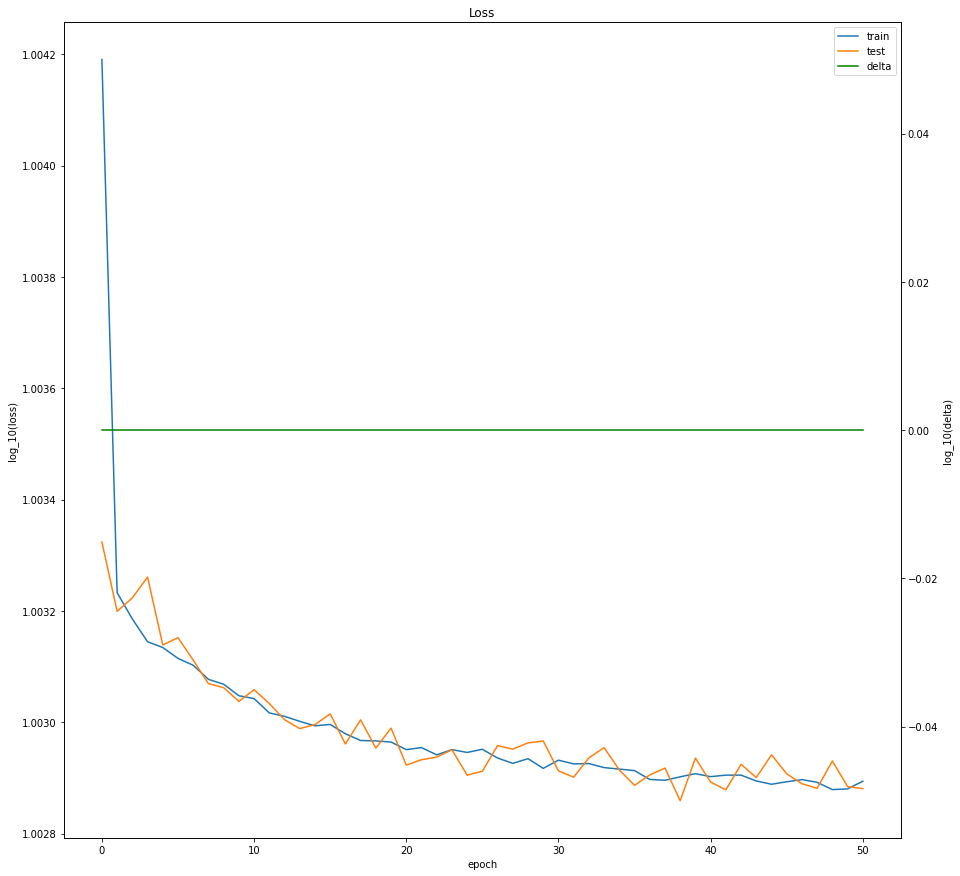

../entropia/fashion-mnist-dequant/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#10.0_.txt


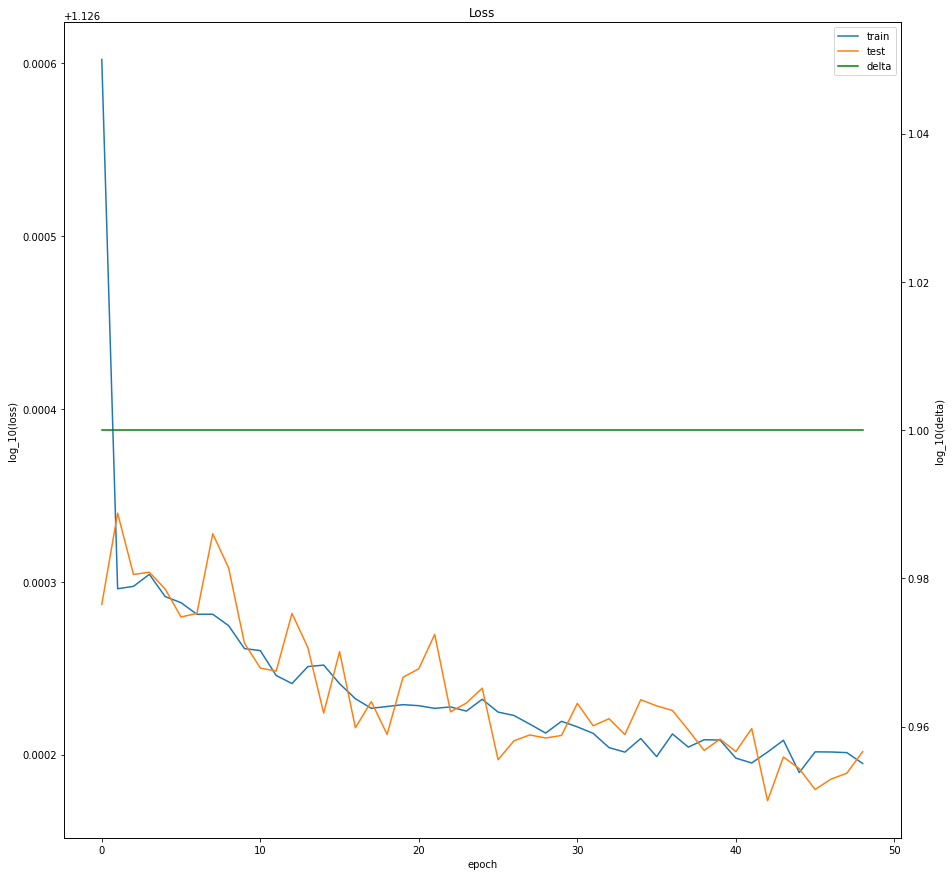

../entropia/fashion-mnist-dequant/losses_train_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#1e-05_.txt


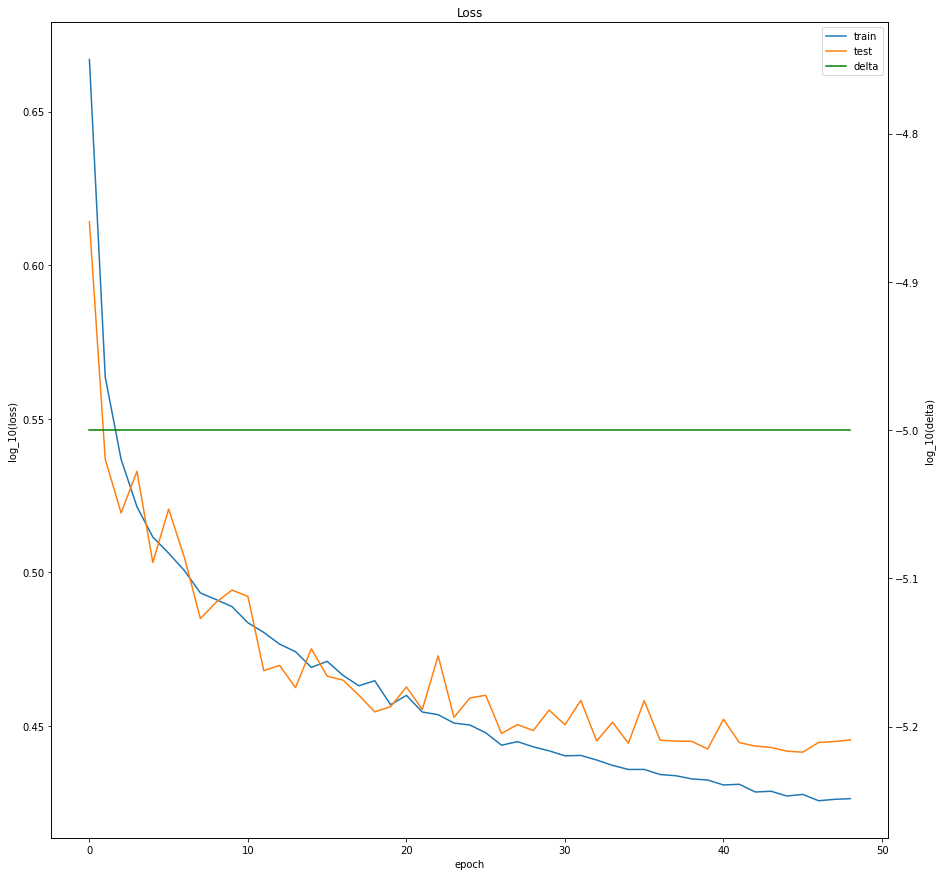

In [50]:
directory = "fashion-mnist-dequant"

for f in sorted(glob.glob(f"../entropia/{directory}/*train*")):
    print(f)
    plot_loss(f, start=0)

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.1_000010.png


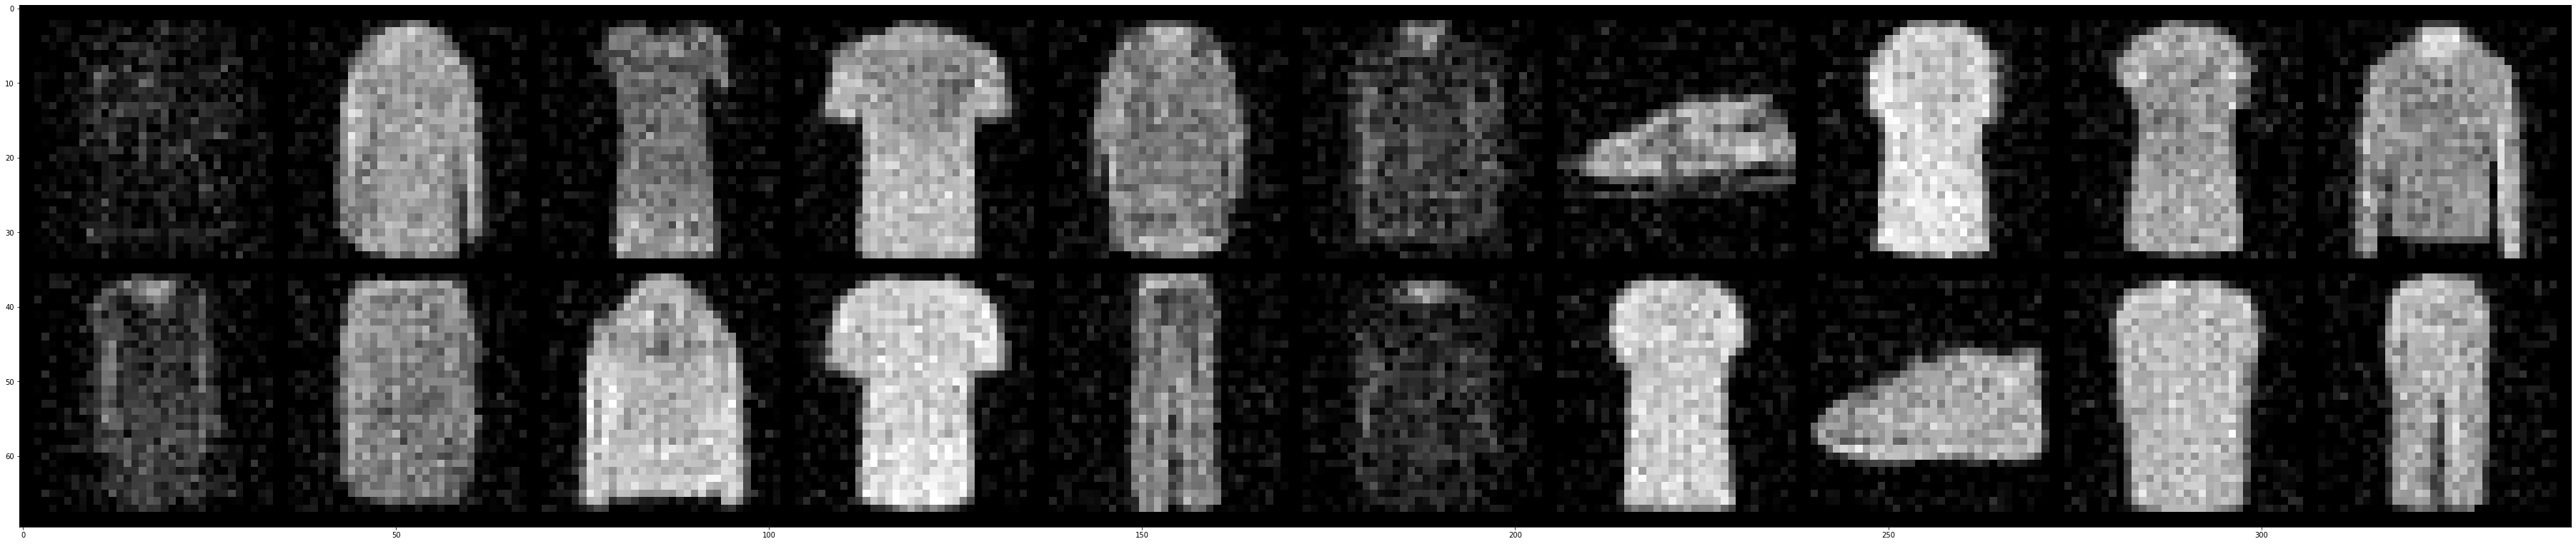

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.1_000020.png


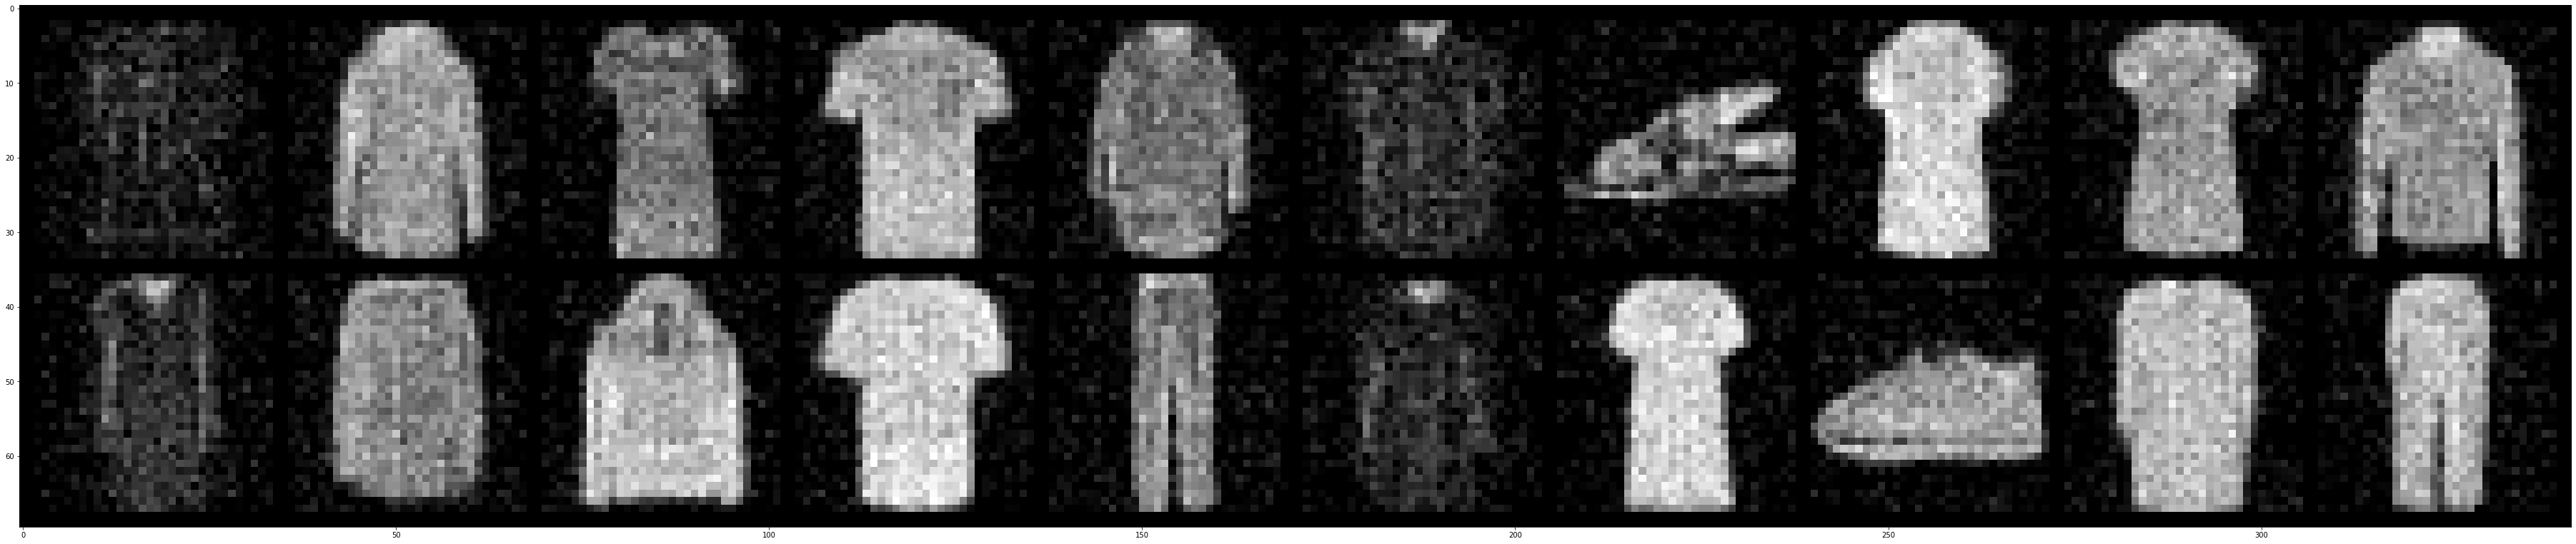

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.1_000030.png


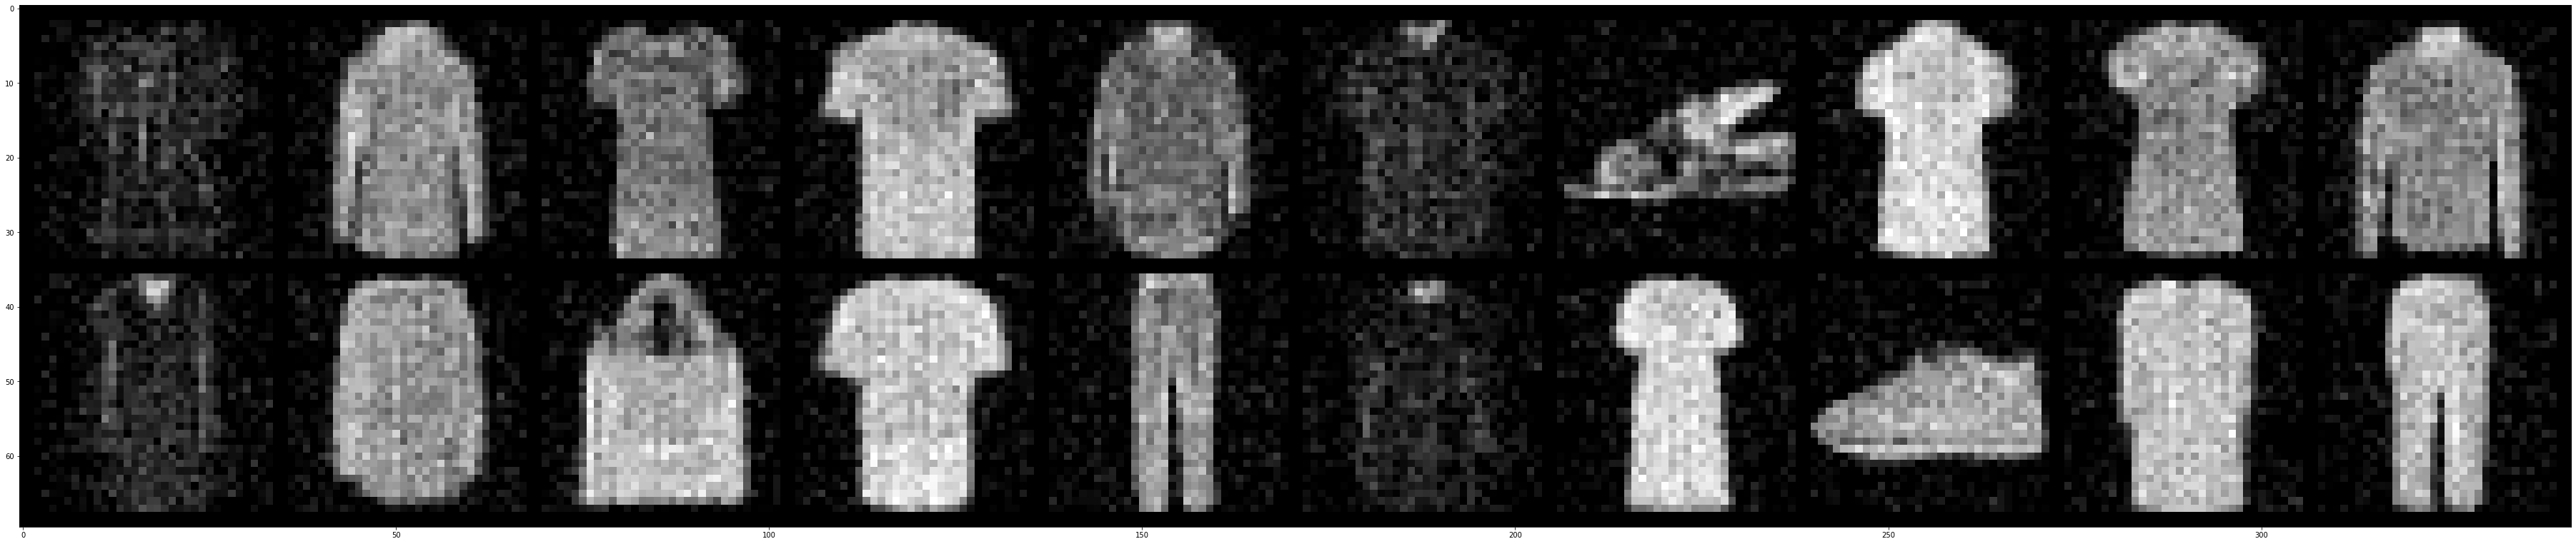

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.1_000040.png


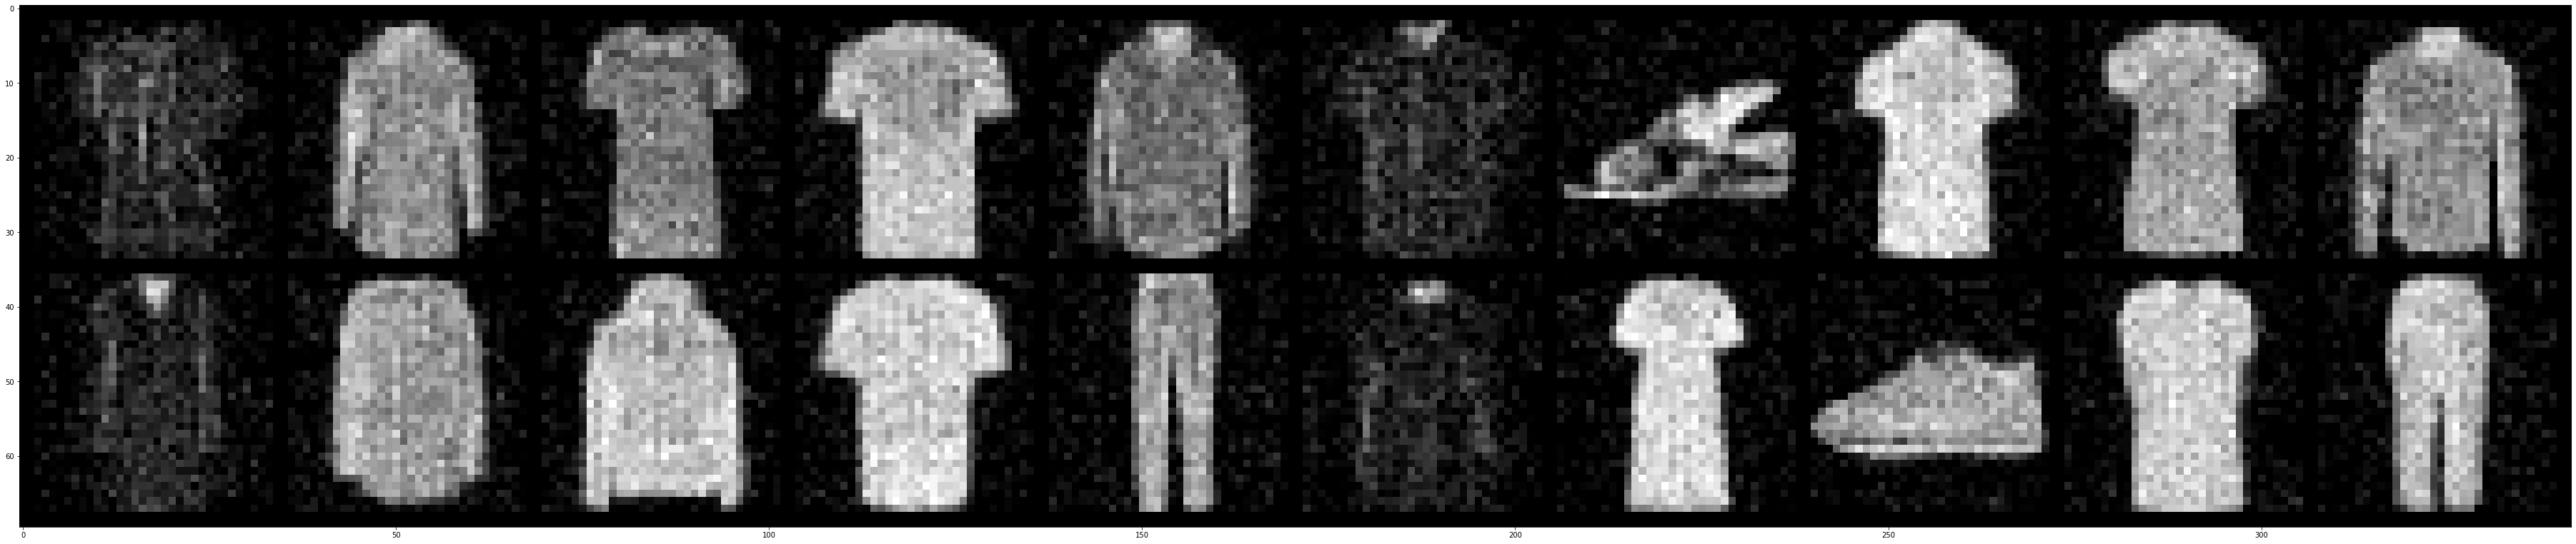

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.1_000050.png


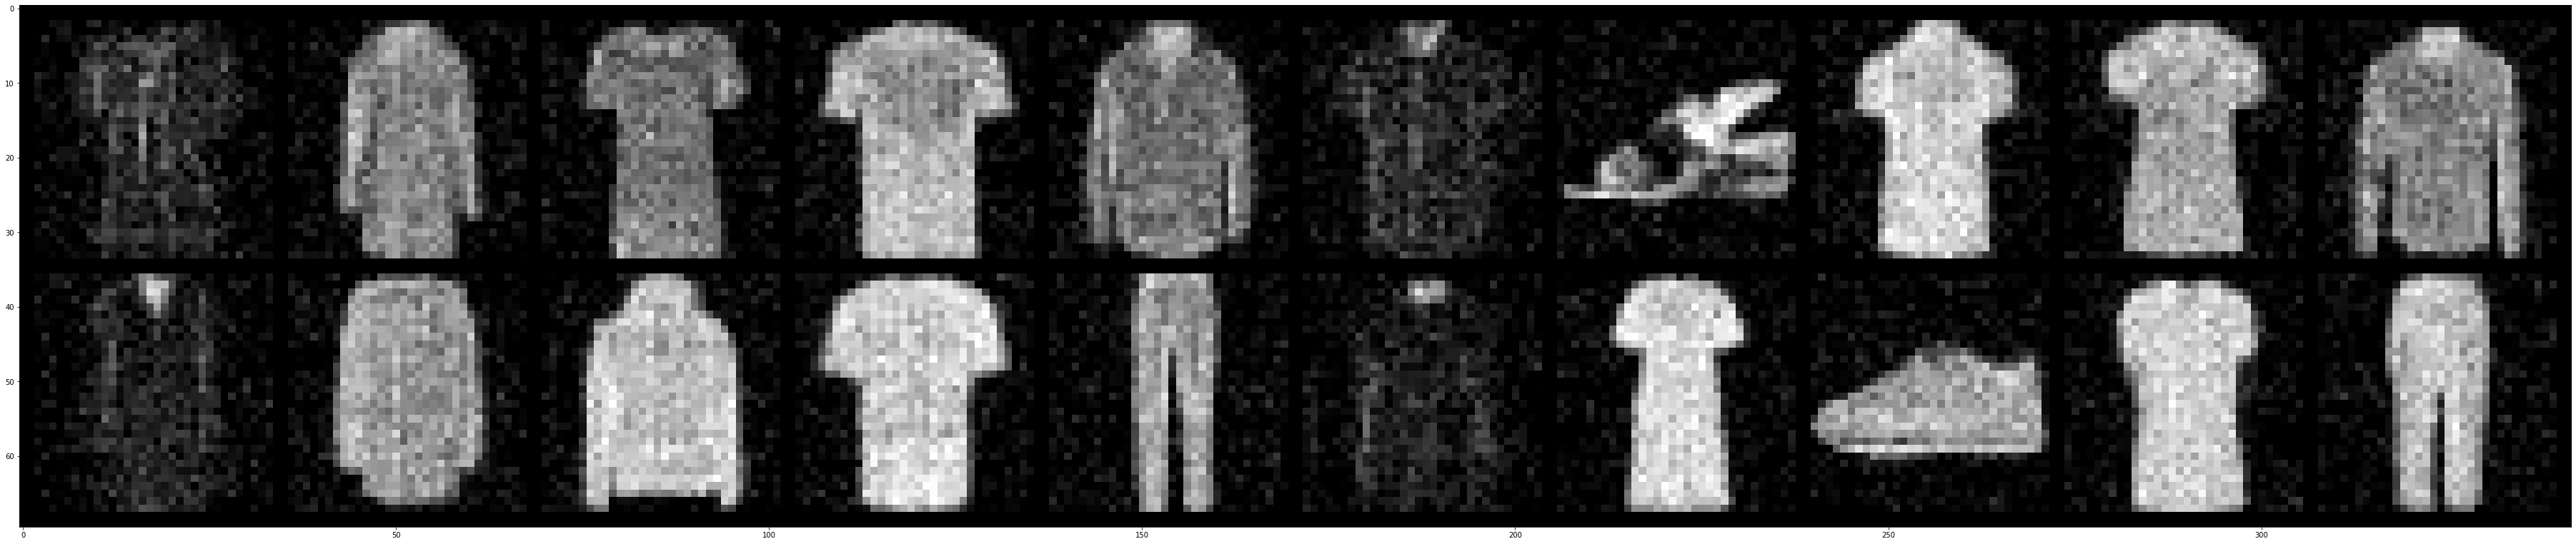

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.08189637274779156_000060.png


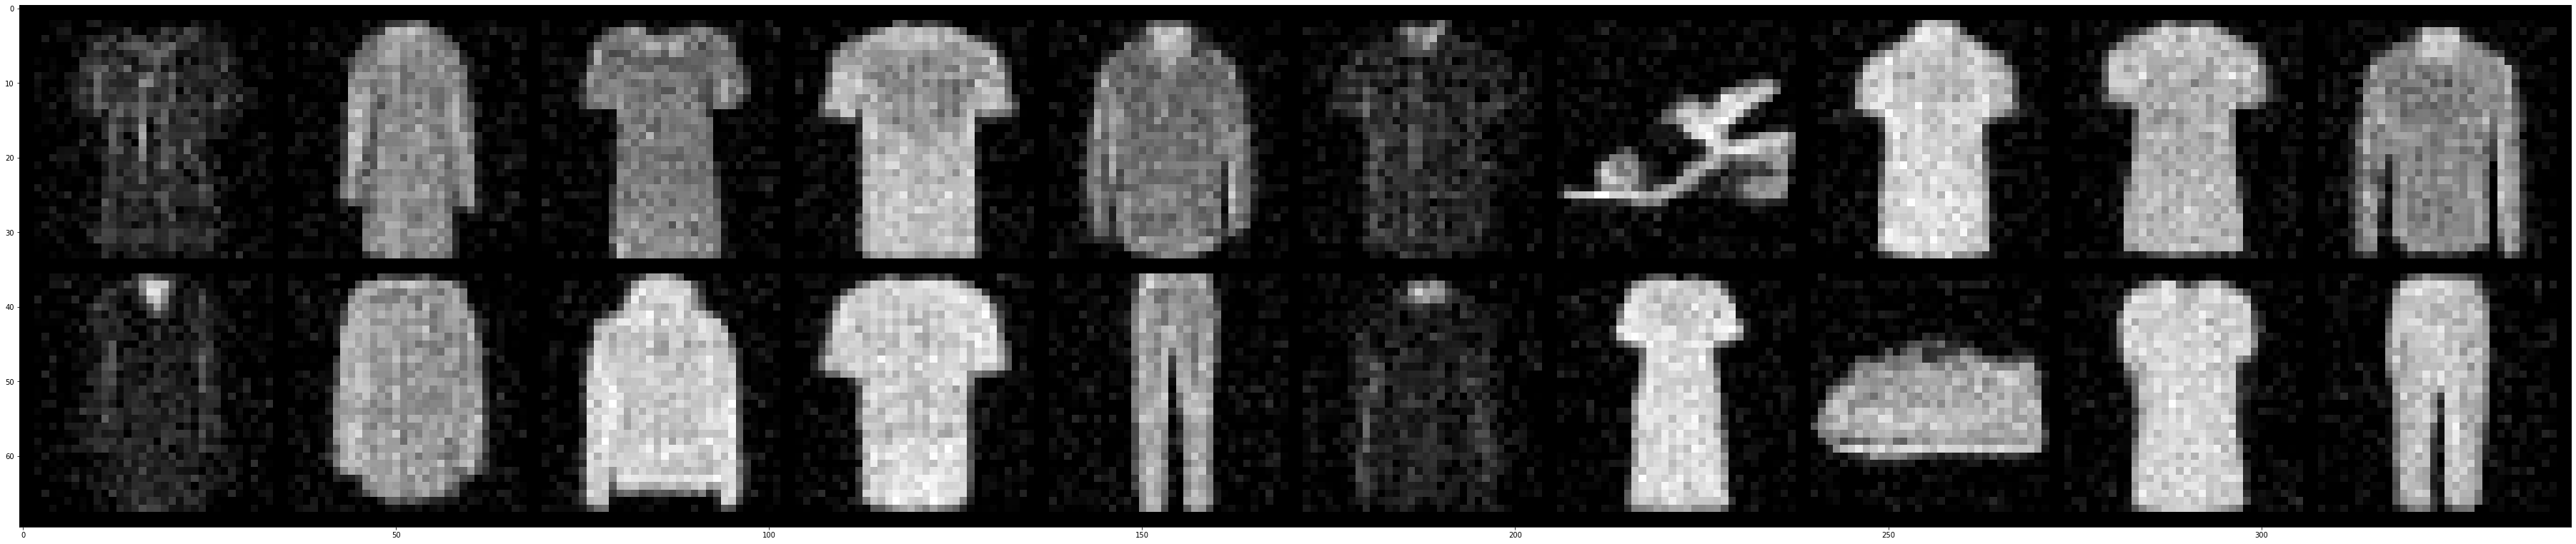

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.06707015869245214_000070.png


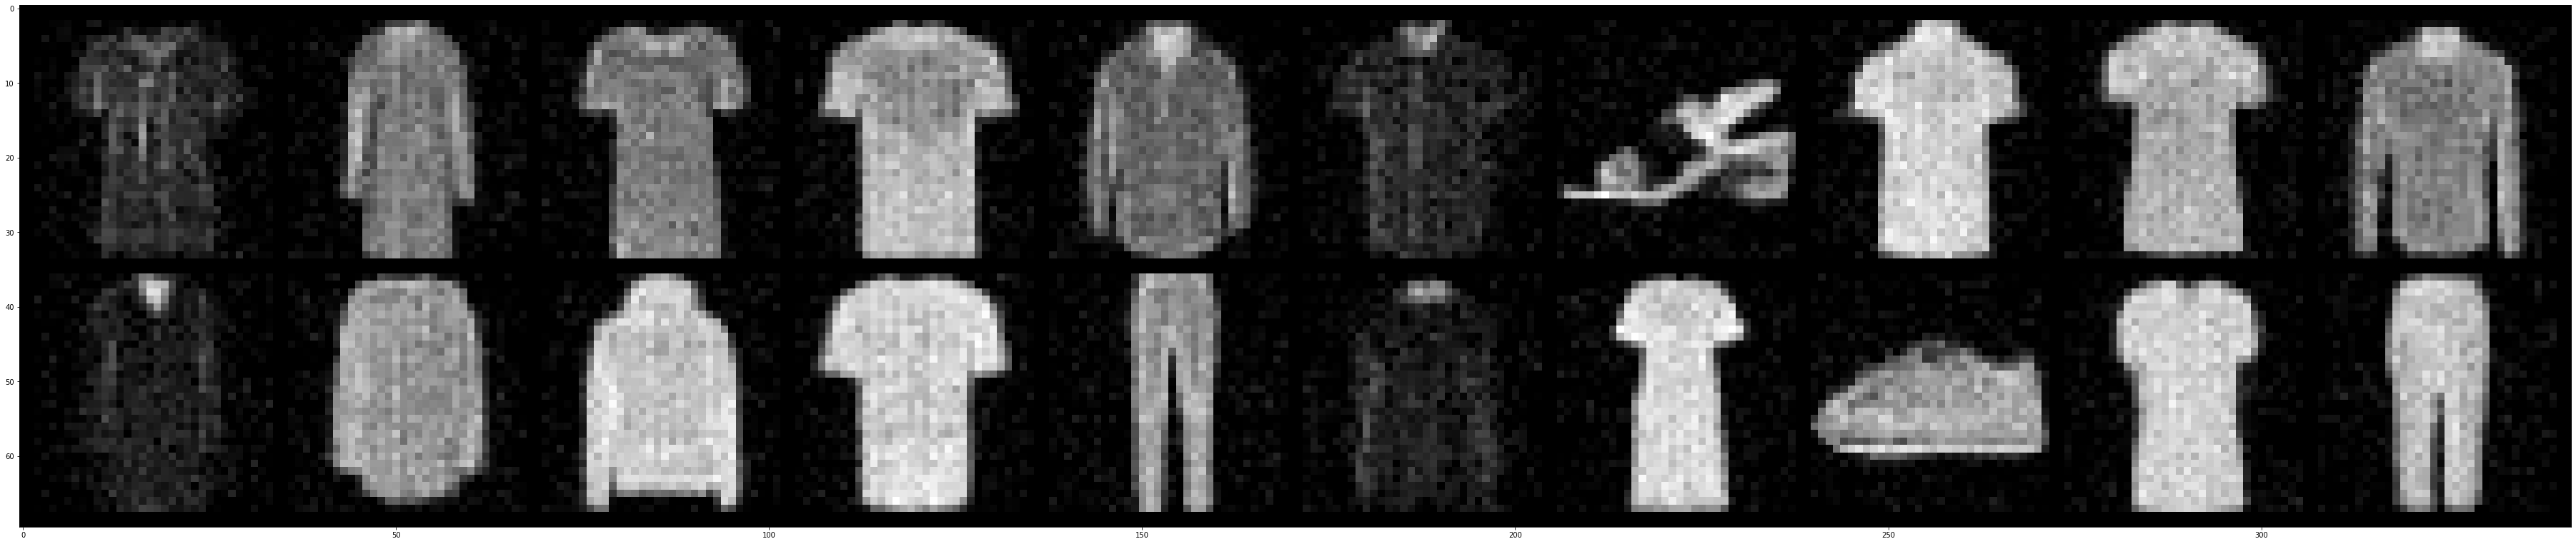

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.054928027165305905_000080.png


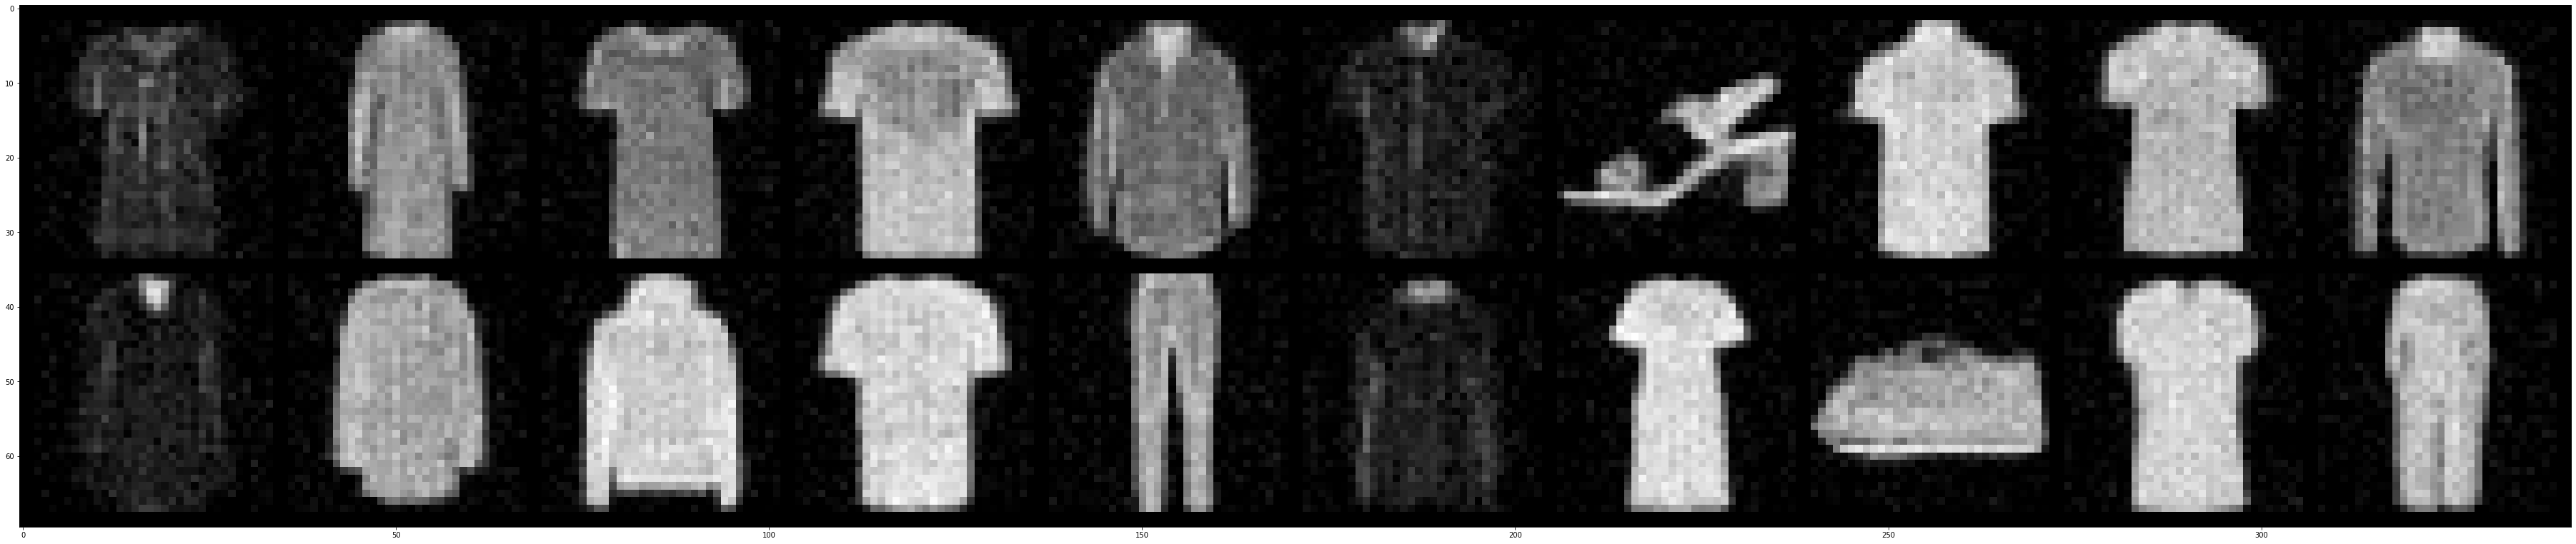

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.04498406187030712_000090.png


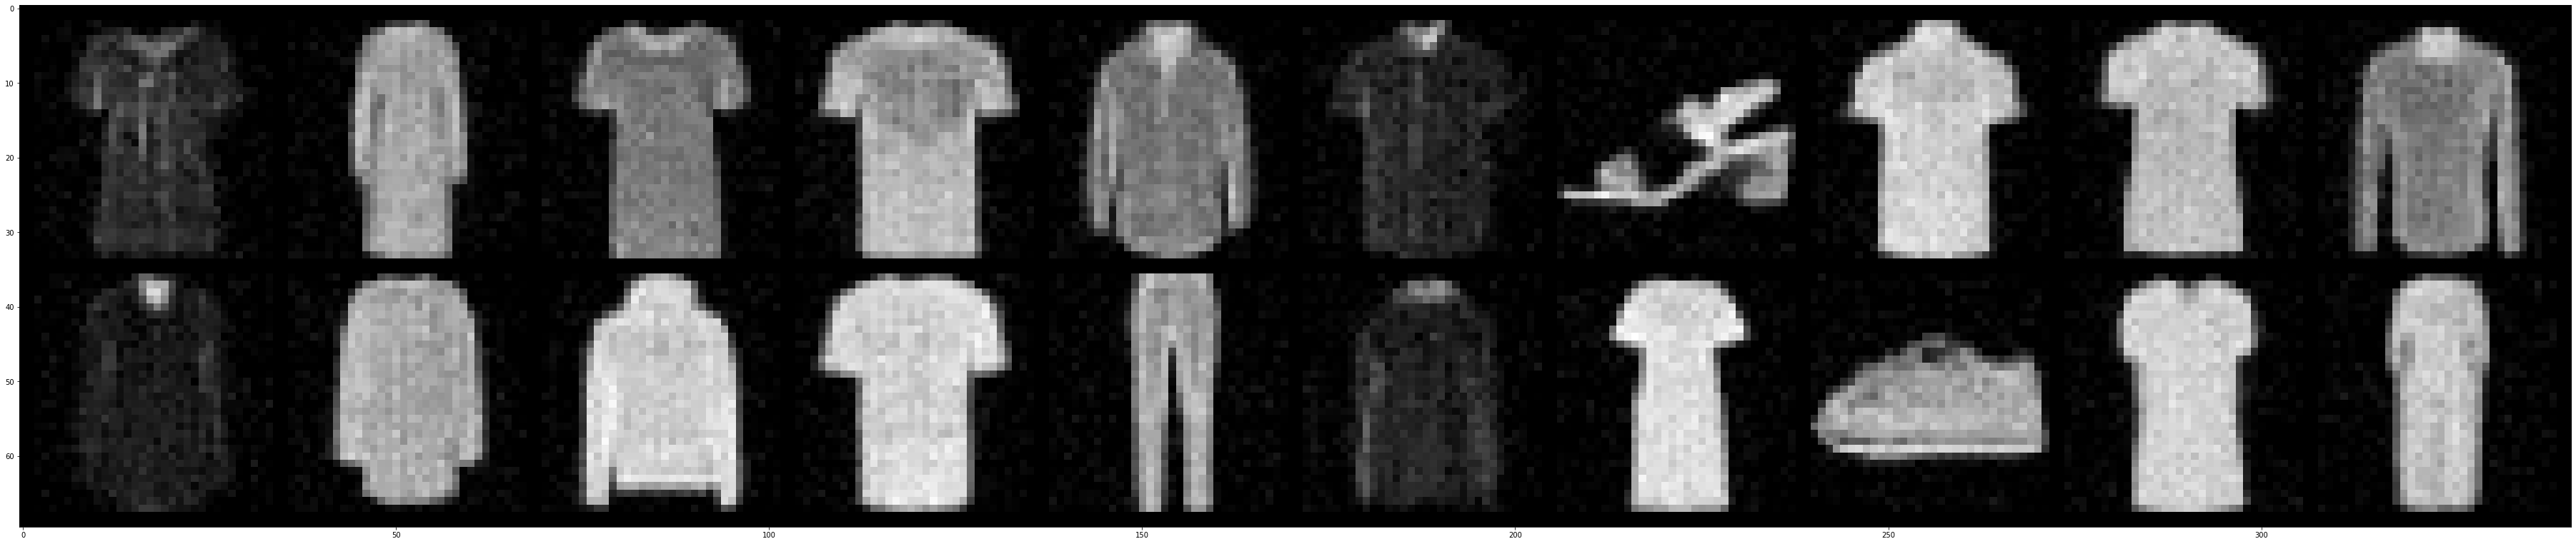

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.03684031498640388_000100.png


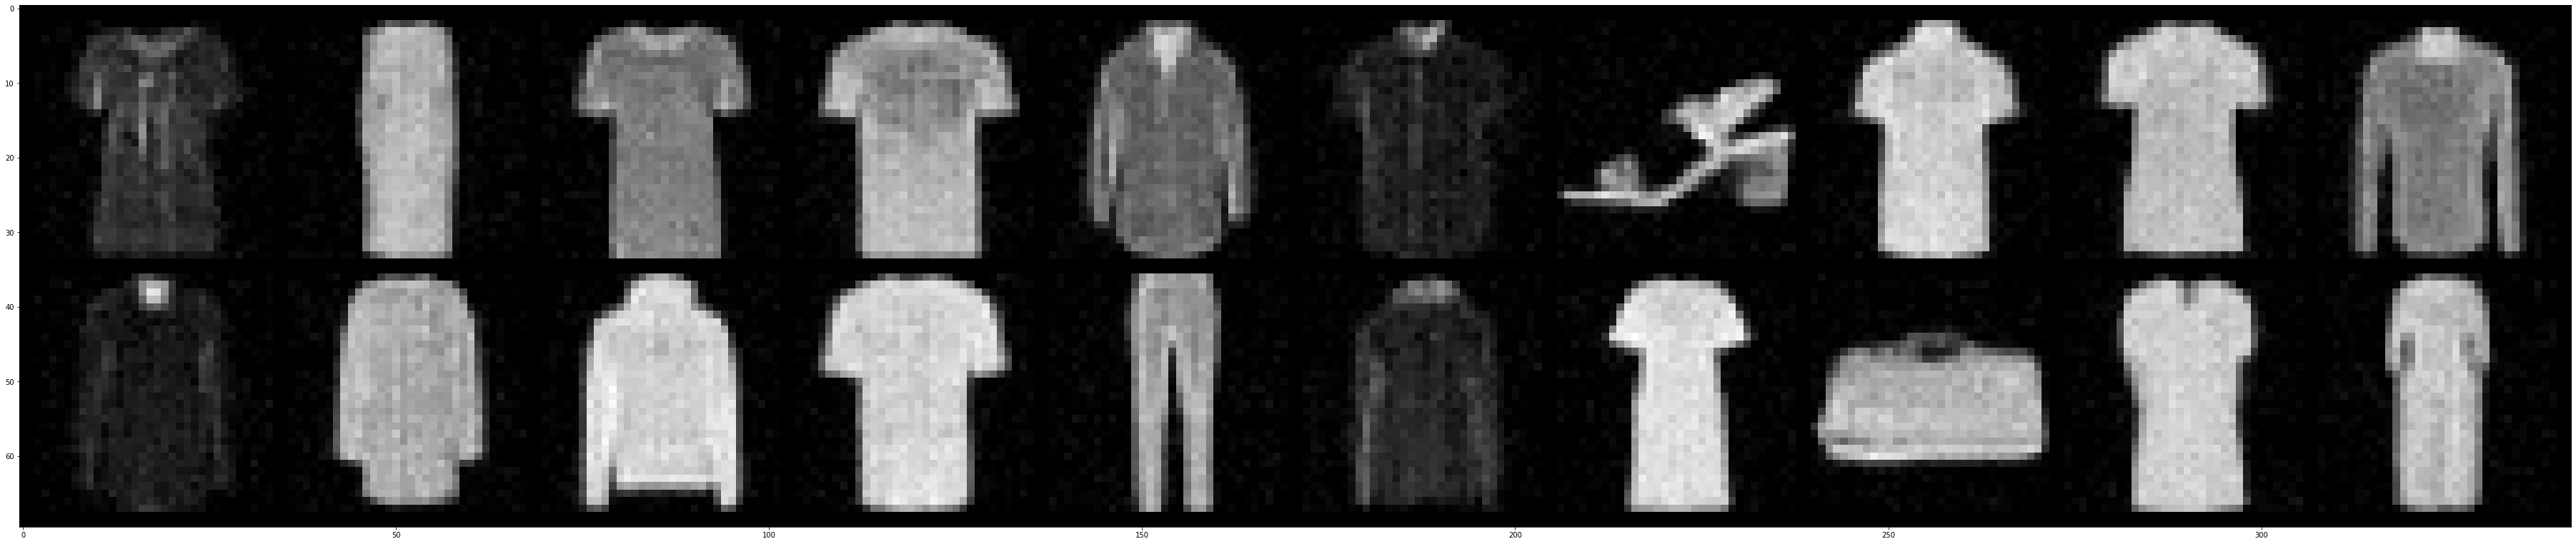

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.030170881682725817_000110.png


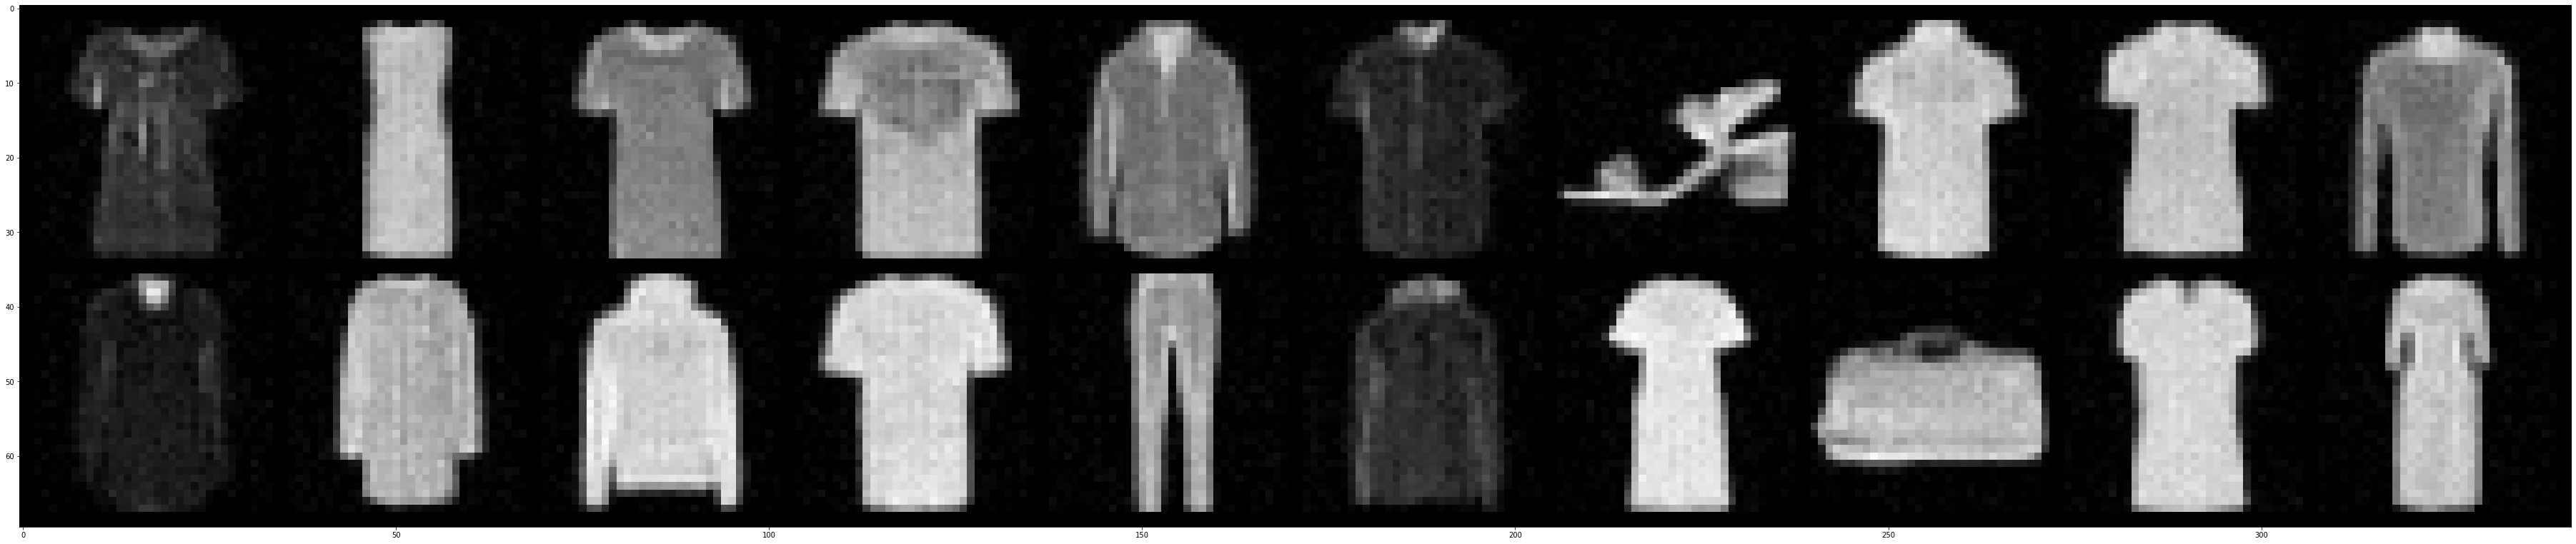

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.024708857724180293_000120.png


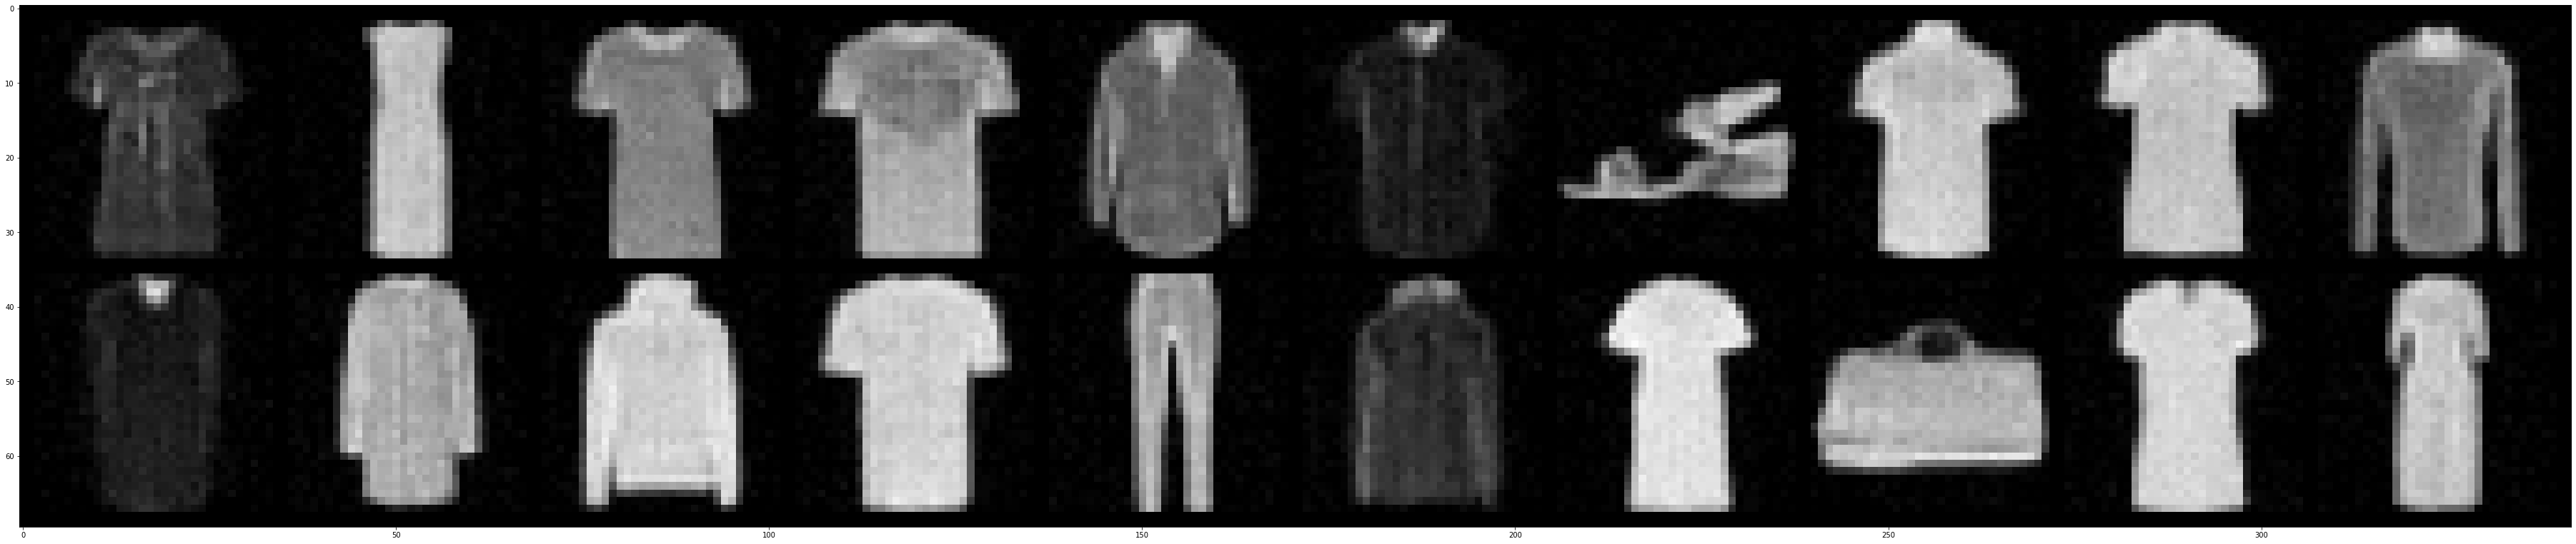

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.020235658223516174_000130.png


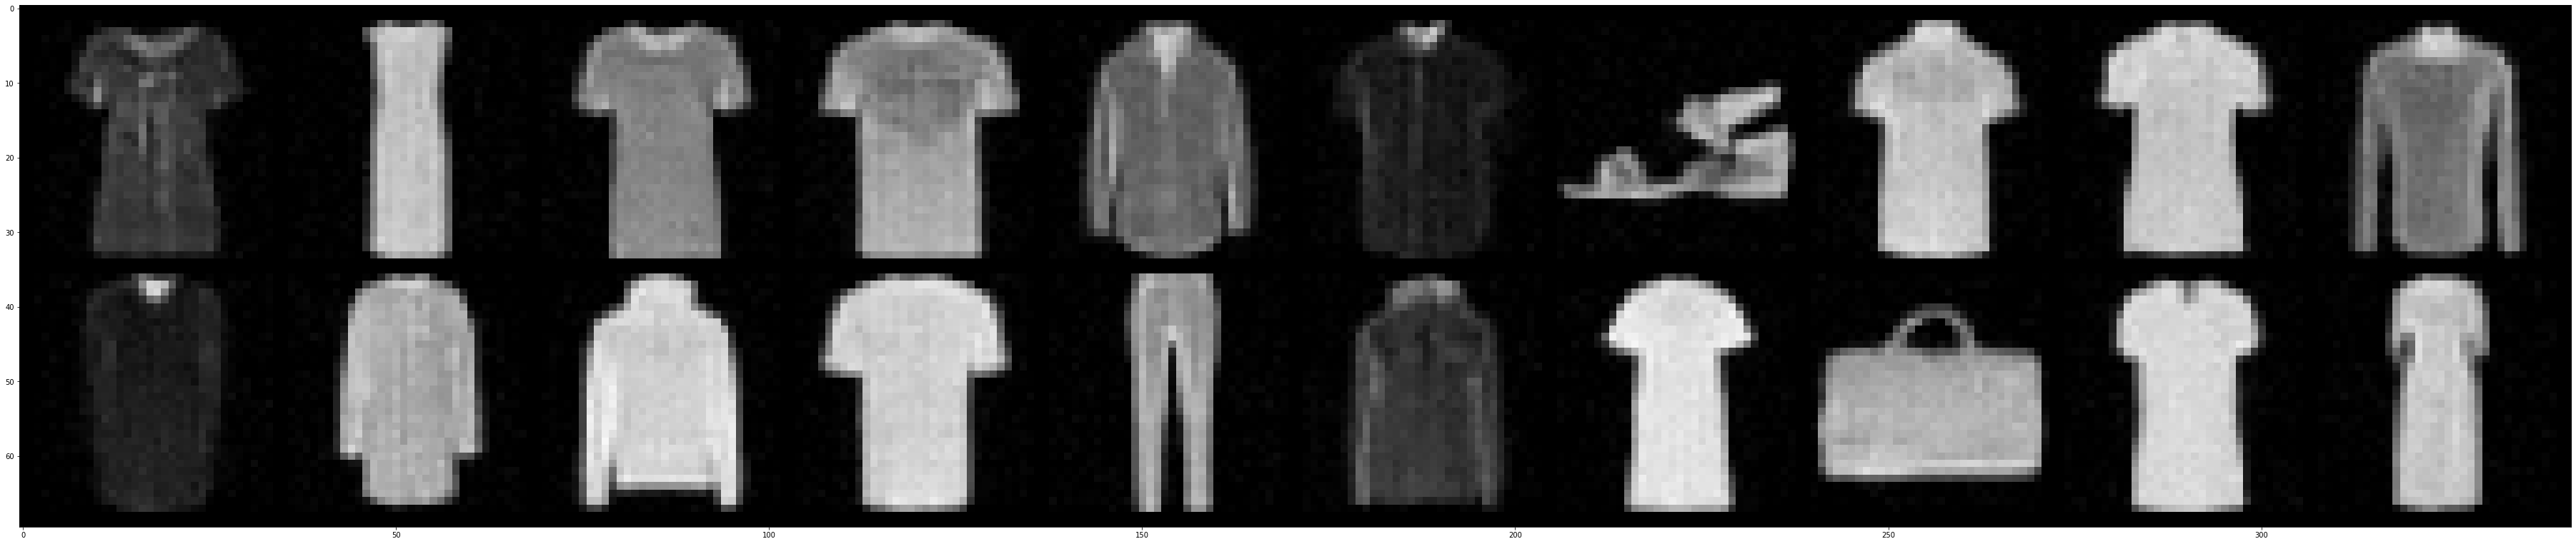

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.016572270086699935_000140.png


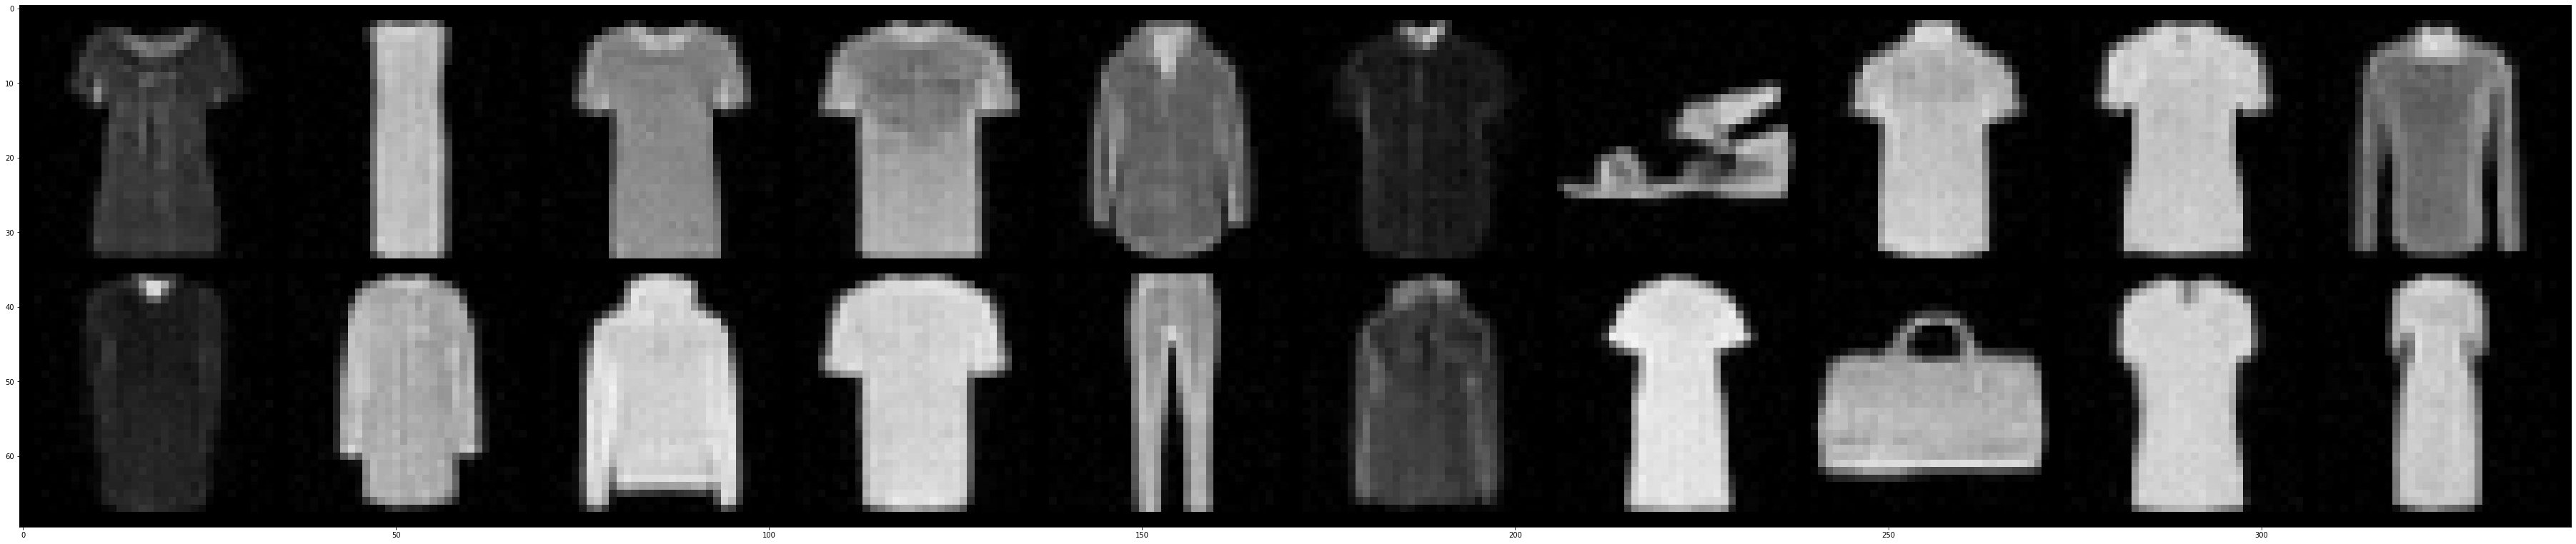

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.013572088082974535_000150.png


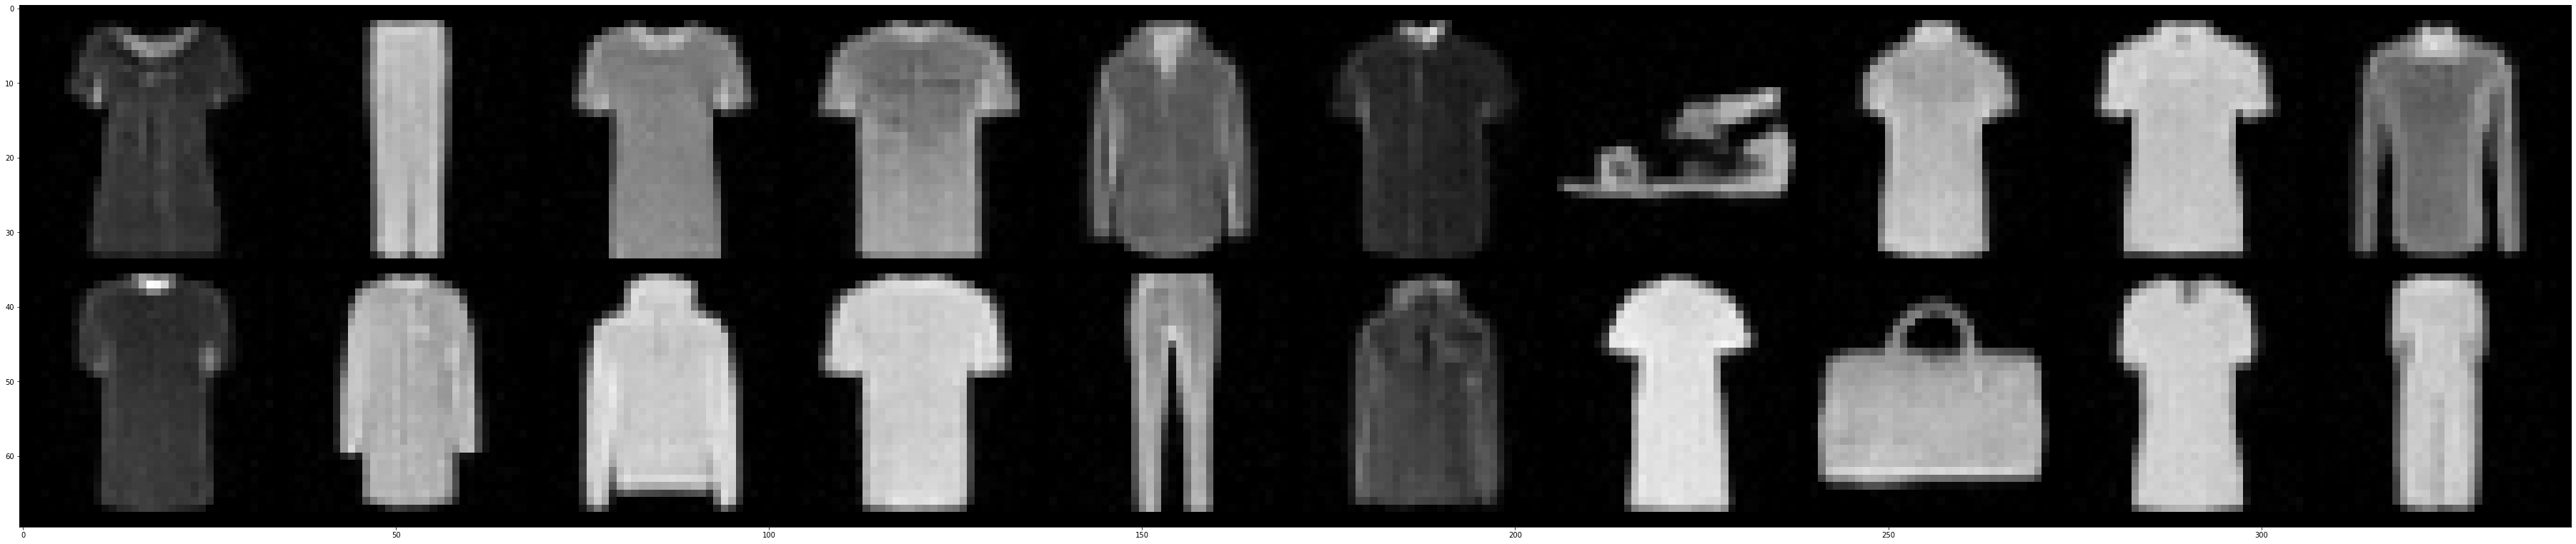

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.01111504784609142_000160.png


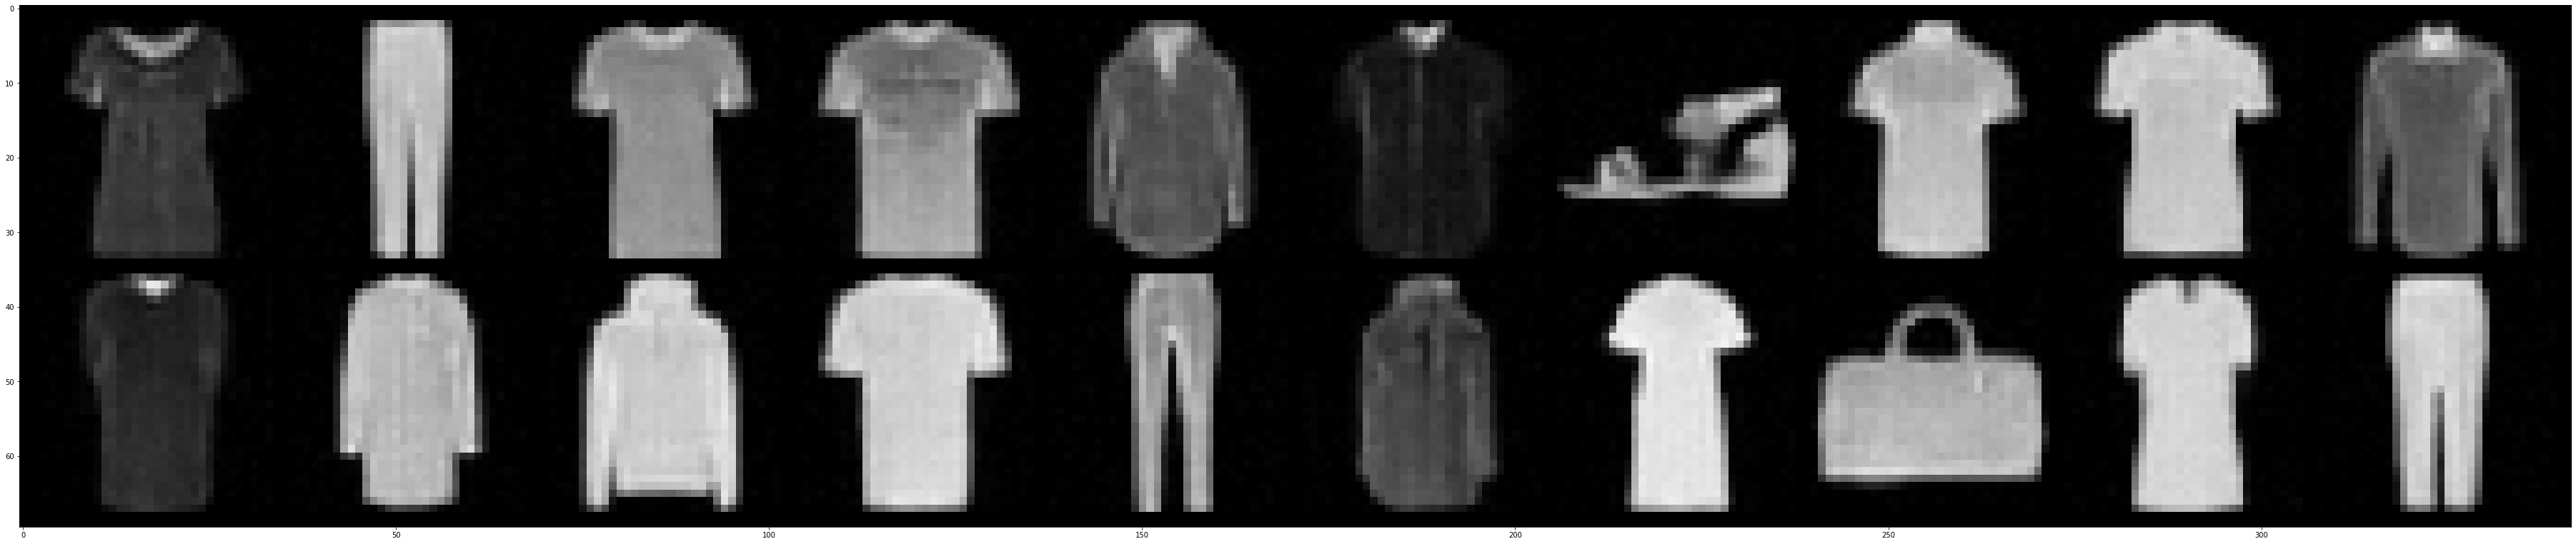

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.009102821015130404_000170.png


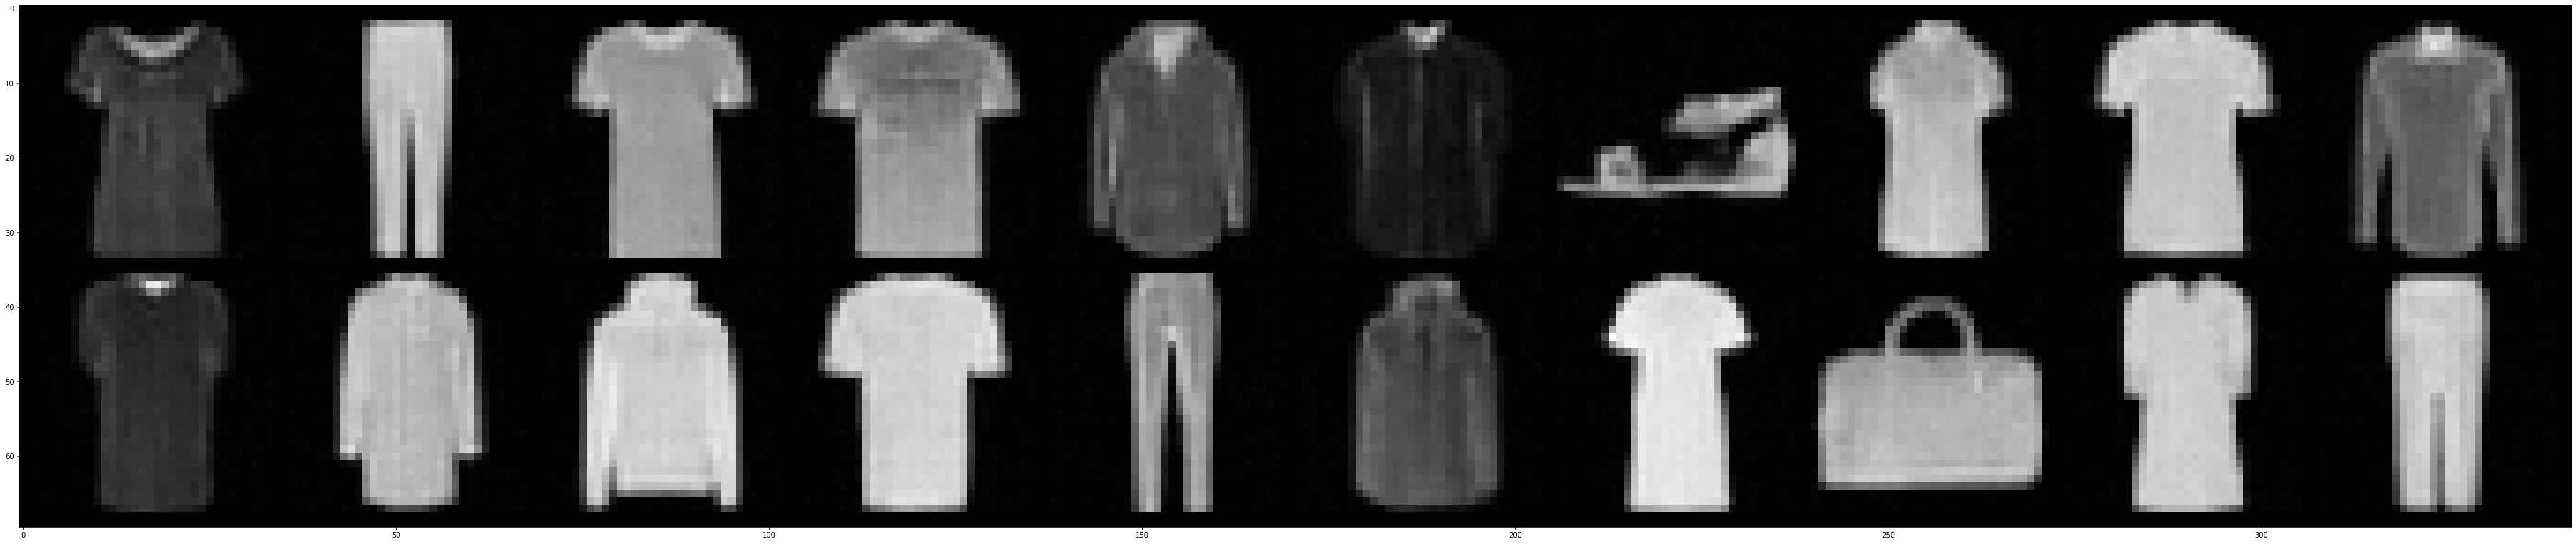

seq_sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.007454880229115496_000180.png


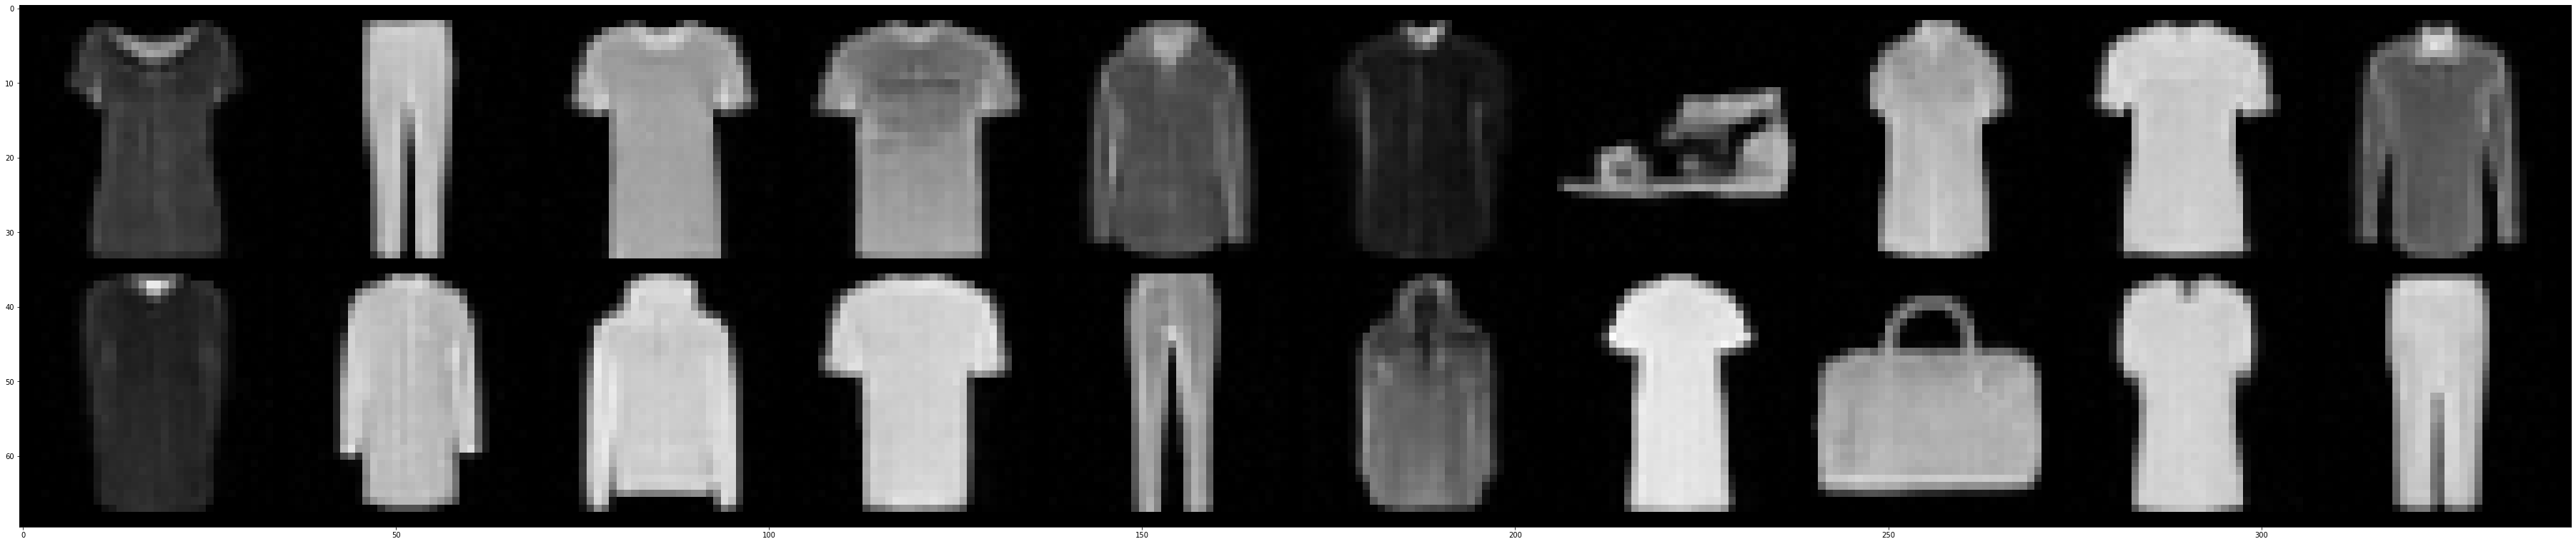

In [40]:
n = 32
for f in sorted(os.listdir(f"../entropia/{directory}/"), key=lambda x: x.split("_")[-1]):
    if '0.png' in f:
        print(f)
        img = Image.open(f"../entropia/{directory}/{f}")
        plt.figure(figsize = (n*2, n*10))
        plt.imshow(img)
        plt.show()
        

sample_batch#64;n_channels#1;epochs#200;n_flow#32;n_block#4;no_lu#False;affine#True;n_bits#8;lr#5e-05;img_size#32;temp#0.7;n_sample#20;dataset#fashion_mnist;device#cuda:0;delta#0.01_000035.png


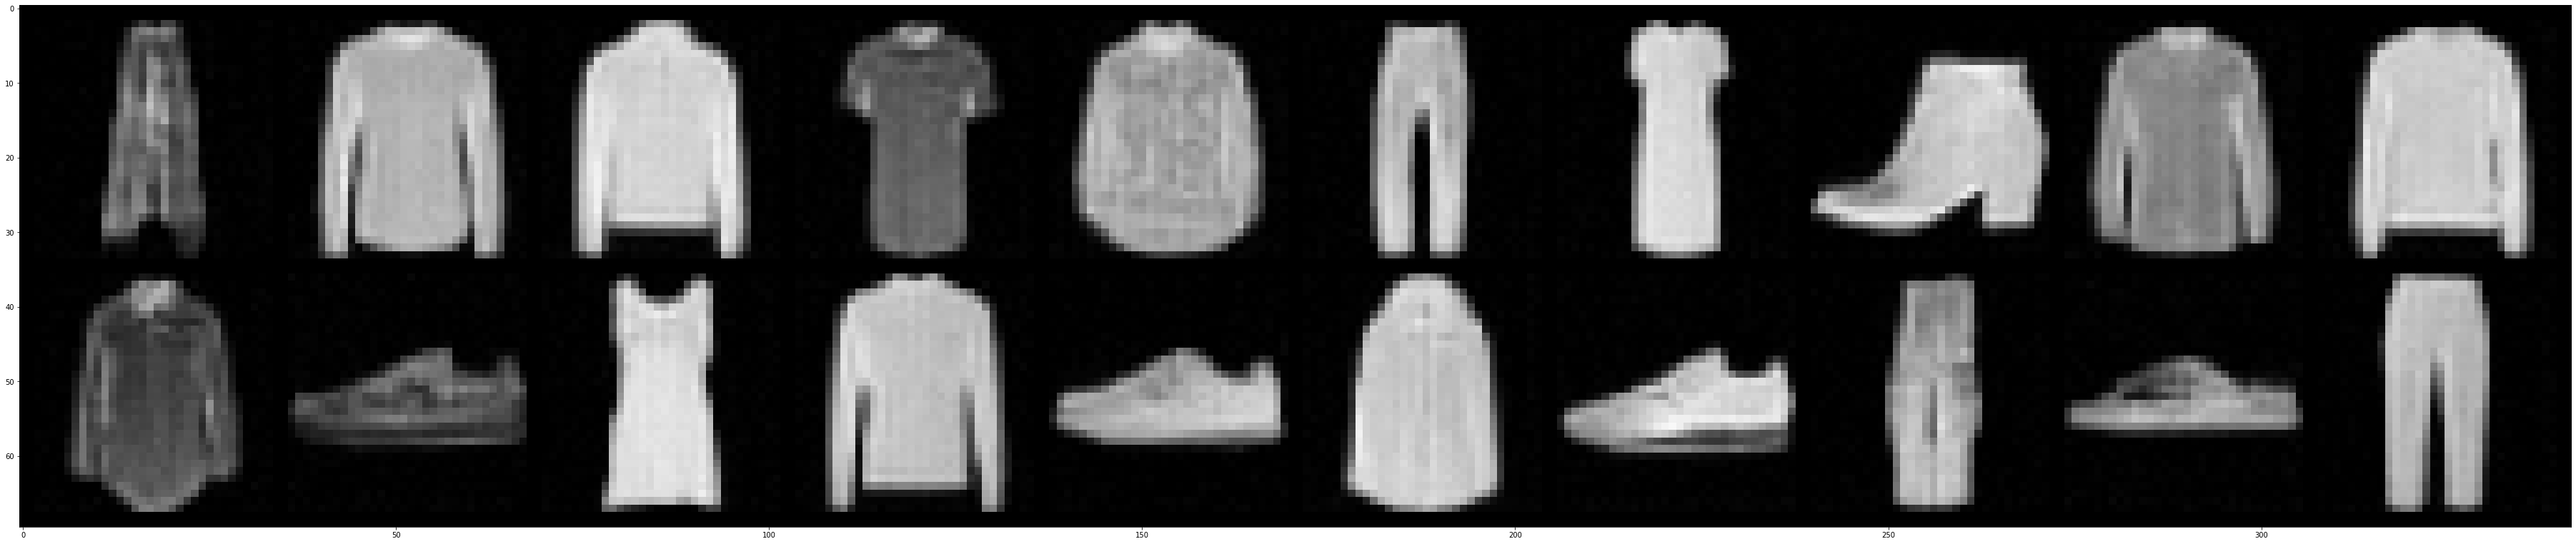

In [32]:
for f in sorted(os.listdir(f"../entropia/{directory}/"), key=lambda x: x.split("_")[-1]):
    if '#0.01_000035.png' in f:
        print(f)
        img = Image.open(f"../entropia/{directory}/{f}")
        plt.figure(figsize = (n*2, n*10))
        plt.imshow(img)
        plt.show()
        